# Required libraries

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings 
warnings.filterwarnings ("ignore")
%matplotlib inline

# Data Preparation

In [5]:
data=pd.read_csv('crx.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
# Renaming dataset's columns
data.columns = ["A1", "A2", "A3", "A4","A5", "A6", "A7", "A8","A9", "A10", "A11", "A12","A13", "A14", "A15","A16"]
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
#checking for the size of our dataset
data.shape

(690, 16)

our dataset contains 690 rows and 16 columns

In [8]:
# checking for unique values in columns
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

A1
['b' 'a' '?']

A2
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '

The dataset contains ? symbol that is probably referring to null value.

In [9]:
#Let's replace ? with Null values
data.replace('?', np.nan,inplace=True)

In [10]:
# it might be better to drop A14 column because it looks like a column of codes like zip codes for example.
data.drop(['A14'],axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A15     690 non-null    int64  
 14  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 81.0+ KB


crx.names tells that A2,A3,A8,A11,A14,A15 are continuous variables.From the data info we can see that all are either float or int ,except A2 so we need to transform them to float

In [12]:
data['A2']=data['A2'].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A15     690 non-null    int64  
 14  A16     690 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.0+ KB


Now we have our dataset ready for analysis,let's save it for future use

In [14]:
data.to_csv('tharerim_project.csv',index=False)

# Exploratory Data Analysis(EDA)

In [15]:
#Checking for missing  values
data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A15     0
A16     0
dtype: int64

our dataset contains missing vakues in A1,A2,A4,A5,A6,A7 columns and they are 24 in total for all the columns 

In [16]:
# Summary statistics
data.describe()

,A2,A3,A8,A11,A15
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


### Visualizations

###### visualizing categorical variables

In [17]:
#Target variable
data['A16'].value_counts(normalize=True)

-    0.555072
+    0.444928
Name: A16, dtype: float64

we can see that 44% percenatge of the credit has been approved.

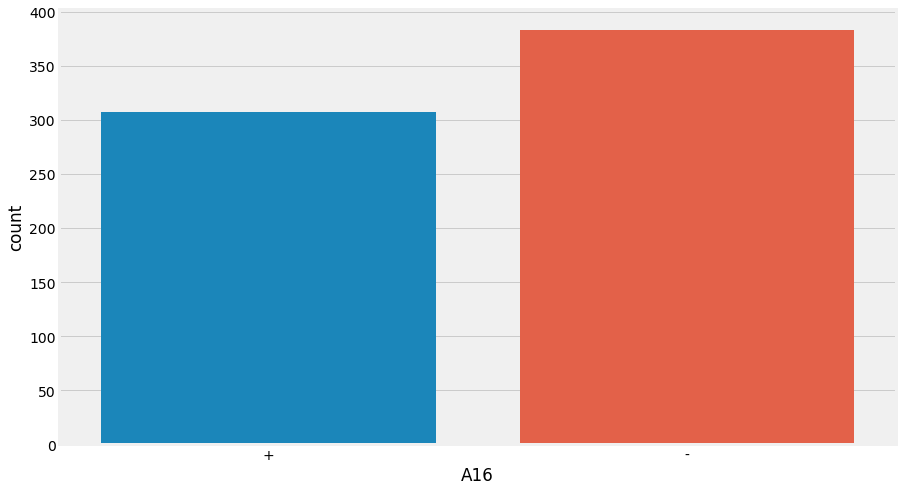

In [18]:
plt.figure(figsize = (15,8))
plt.style.use('fivethirtyeight')
sns.countplot(data['A16'])
plt.show()

Distribution of data in A1 among its categories
b    0.690265
a    0.309735
Name: A1, dtype: float64



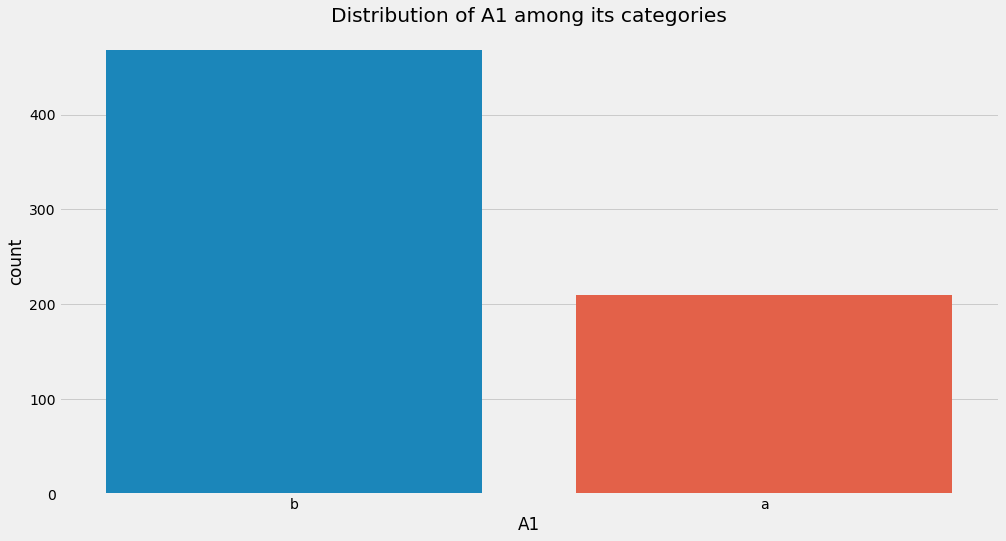

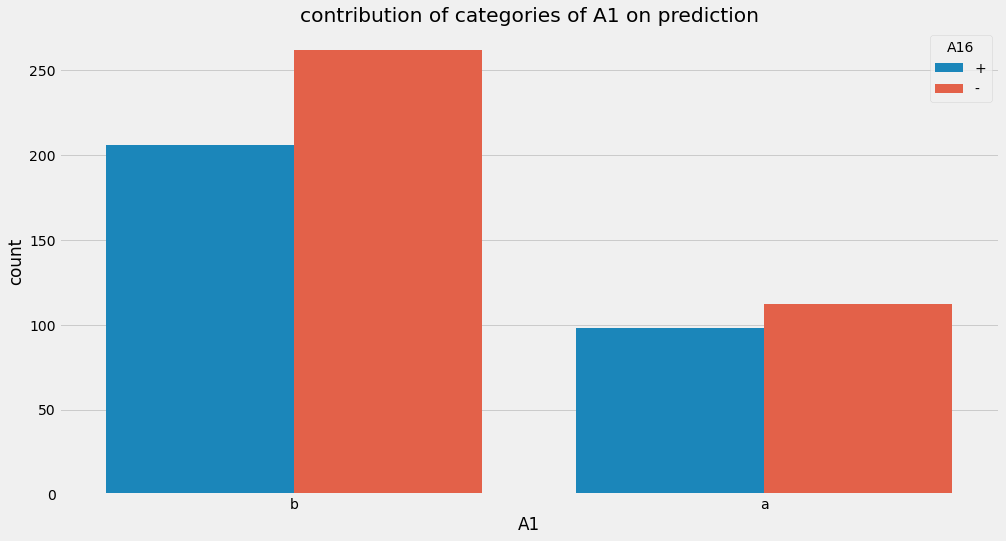

In [19]:
#Let'us Creating helper function for doing visualization of categorical variables
def Categorical_visual(col):
    print(f'Distribution of data in {col} among its categories')
    print(data[col].value_counts(normalize=True))
    print()
    plt.figure(figsize = (15,8))
    plt.style.use('fivethirtyeight')
    sns.countplot(data[col])
    plt.title(f'Distribution of {col} among its categories')
    plt.figure(figsize = (15,8))
    sns.countplot(data[col], hue=data['A16'])
    plt.title(f'contribution of categories of {col} on prediction')
Categorical_visual('A1')    

Distribution of data in A4 among its categories
u    0.758772
y    0.238304
l    0.002924
Name: A4, dtype: float64



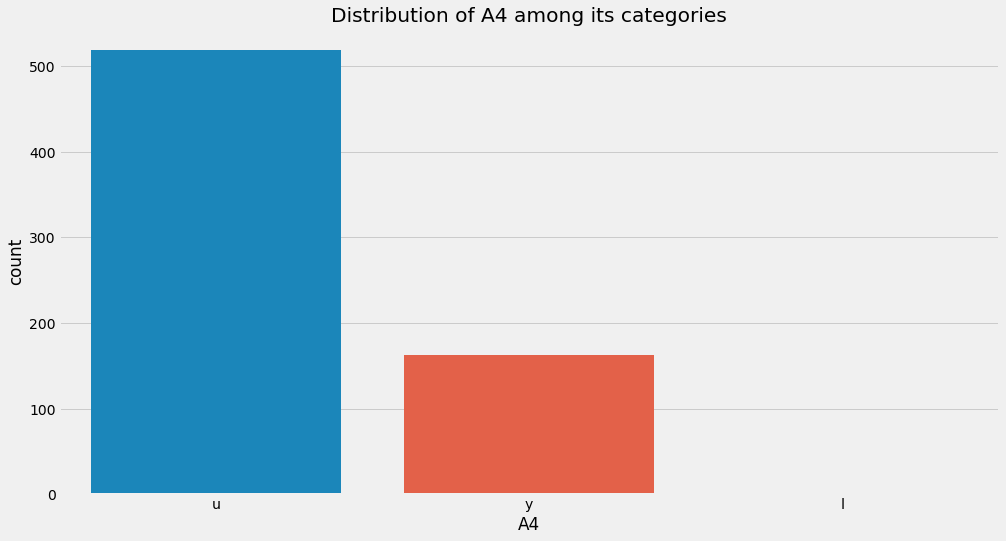

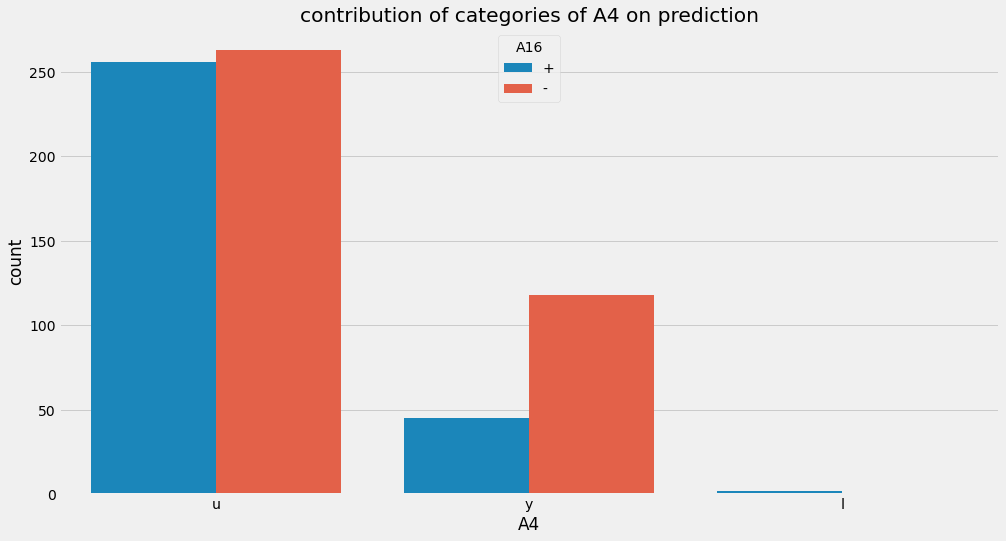

In [20]:
Categorical_visual('A4')

Distribution of data in A5 among its categories
g     0.758772
p     0.238304
gg    0.002924
Name: A5, dtype: float64



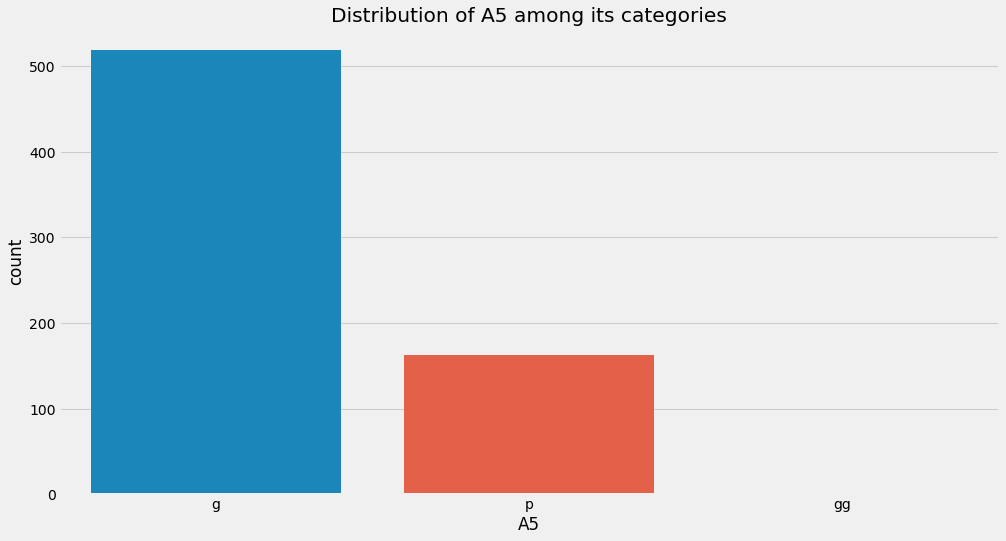

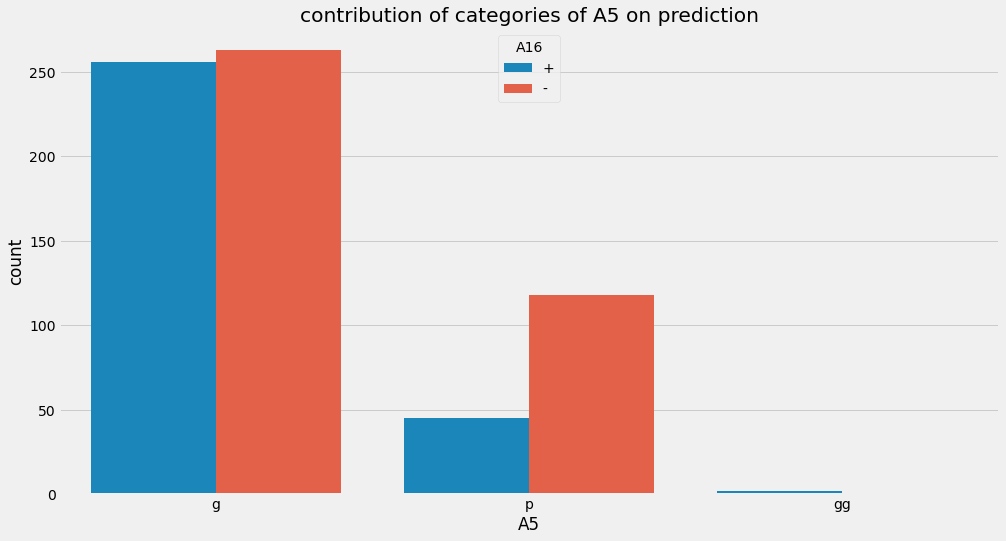

In [21]:
Categorical_visual('A5')

Distribution of data in A6 among its categories
c     0.201175
q     0.114537
w     0.093979
i     0.086637
aa    0.079295
ff    0.077827
k     0.074890
cc    0.060206
m     0.055800
x     0.055800
d     0.044053
e     0.036711
j     0.014684
r     0.004405
Name: A6, dtype: float64



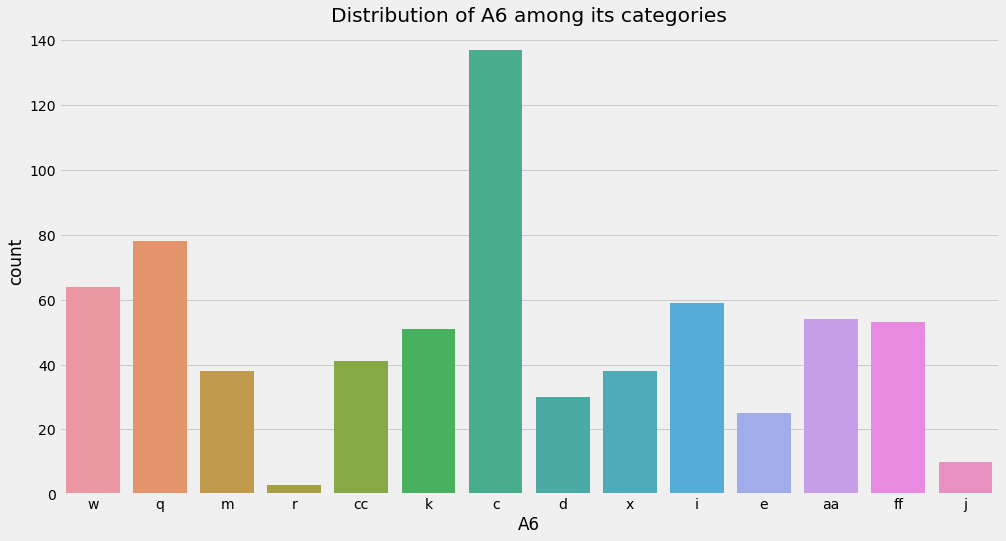

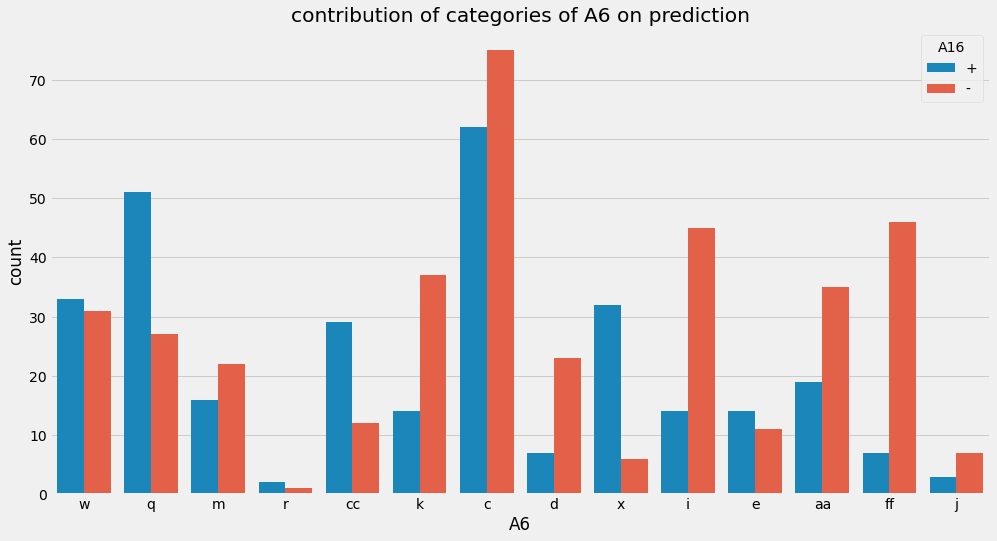

In [22]:
Categorical_visual('A6')

Distribution of data in A7 among its categories
v     0.585903
h     0.202643
bb    0.086637
ff    0.083700
j     0.011747
z     0.011747
dd    0.008811
n     0.005874
o     0.002937
Name: A7, dtype: float64



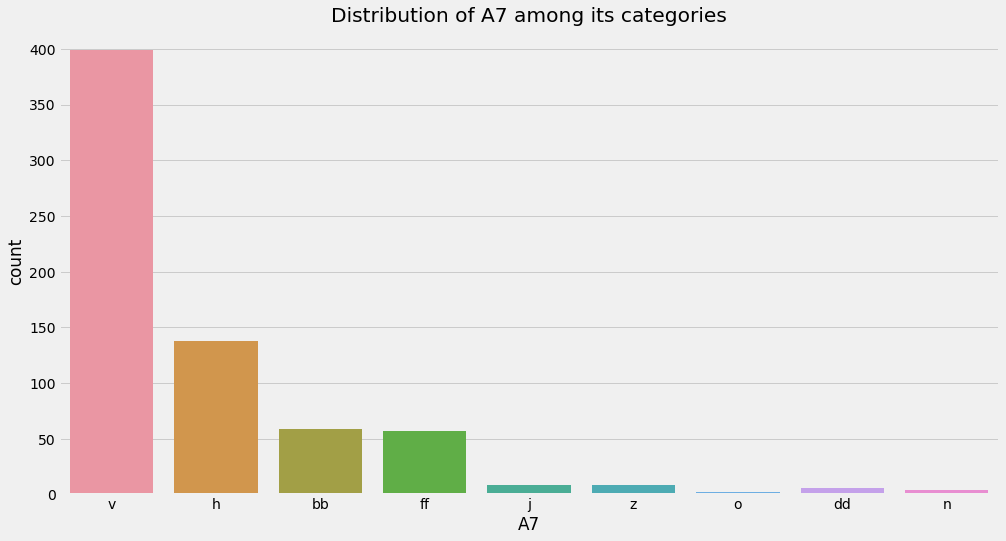

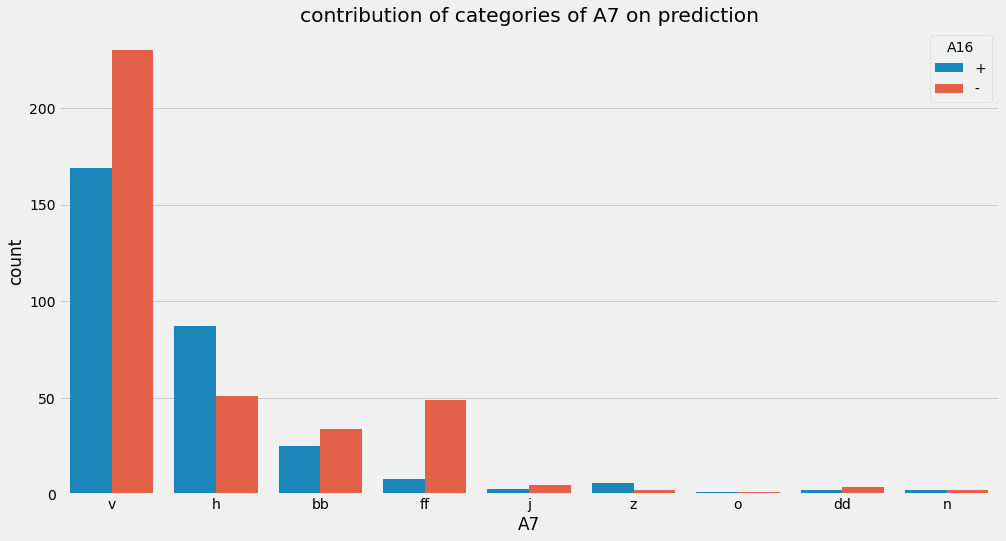

In [23]:
Categorical_visual('A7')

Distribution of data in A9 among its categories
t    0.523188
f    0.476812
Name: A9, dtype: float64



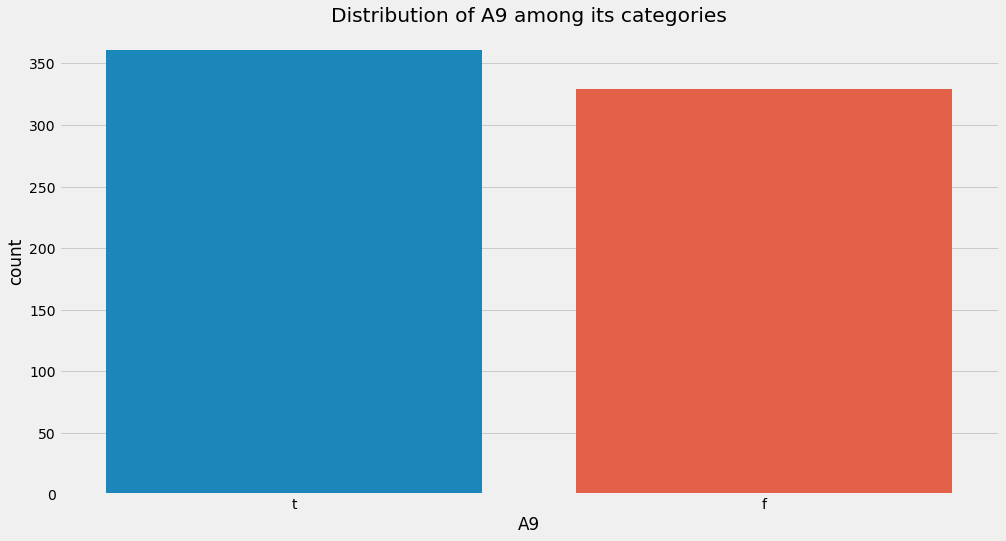

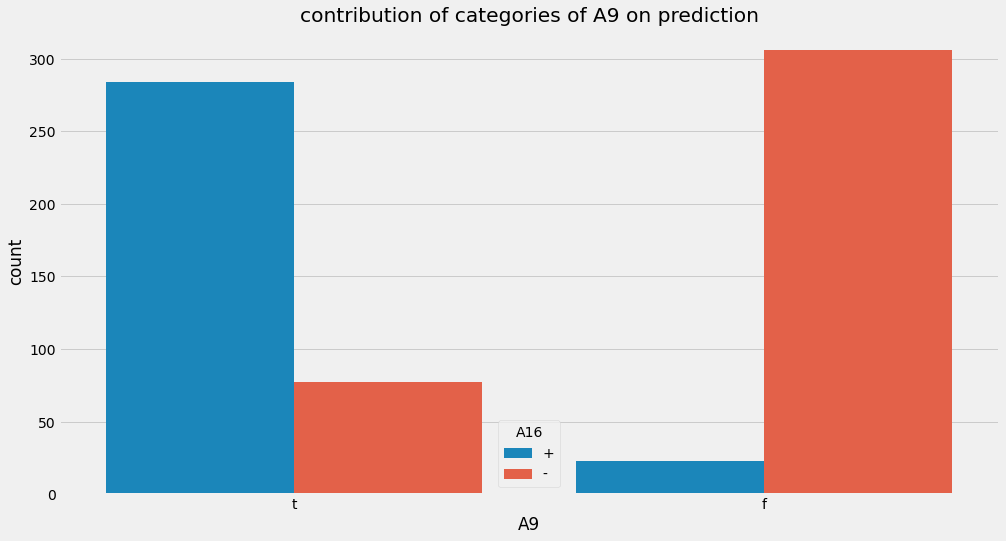

In [24]:
Categorical_visual('A9')

Distribution of data in A10 among its categories
f    0.572464
t    0.427536
Name: A10, dtype: float64



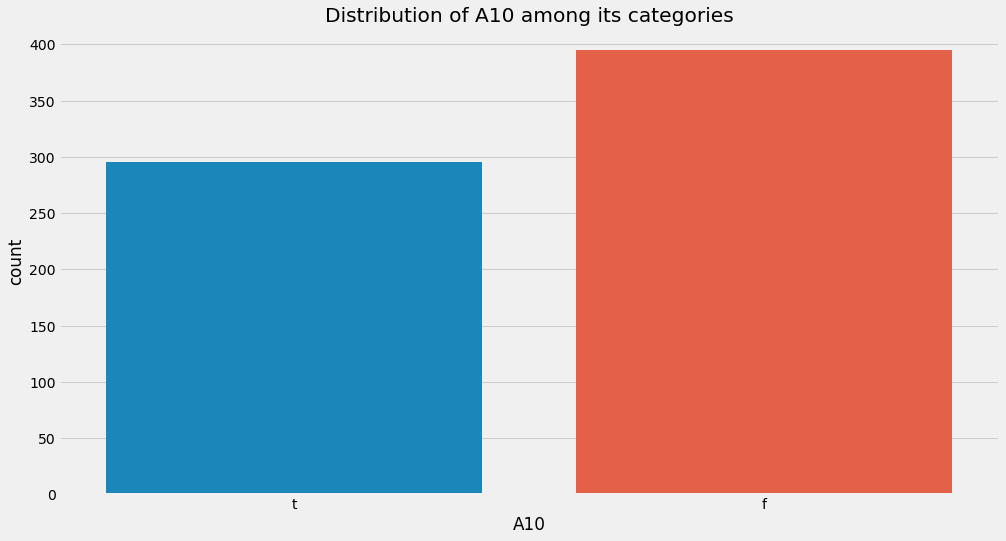

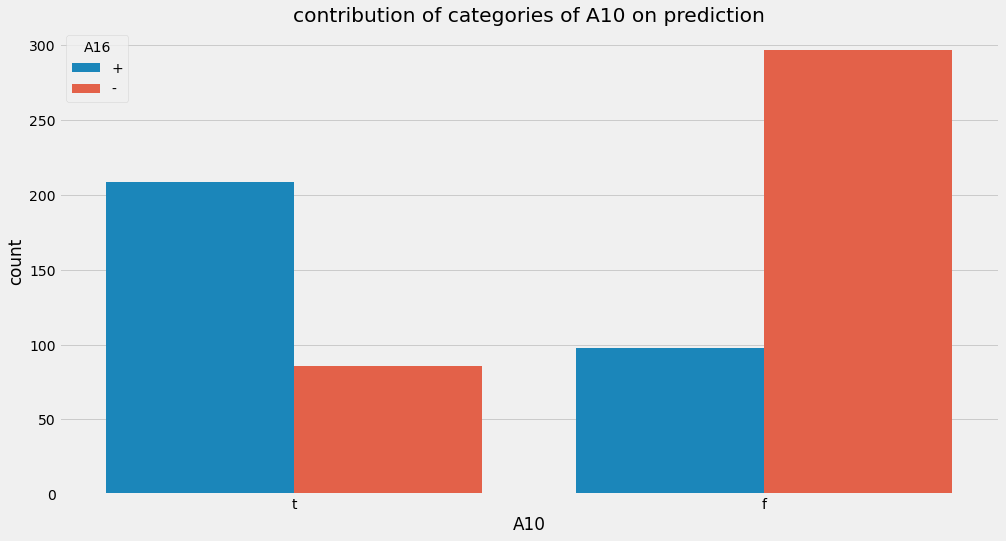

In [25]:
Categorical_visual('A10')

Distribution of data in A12 among its categories
f    0.542029
t    0.457971
Name: A12, dtype: float64



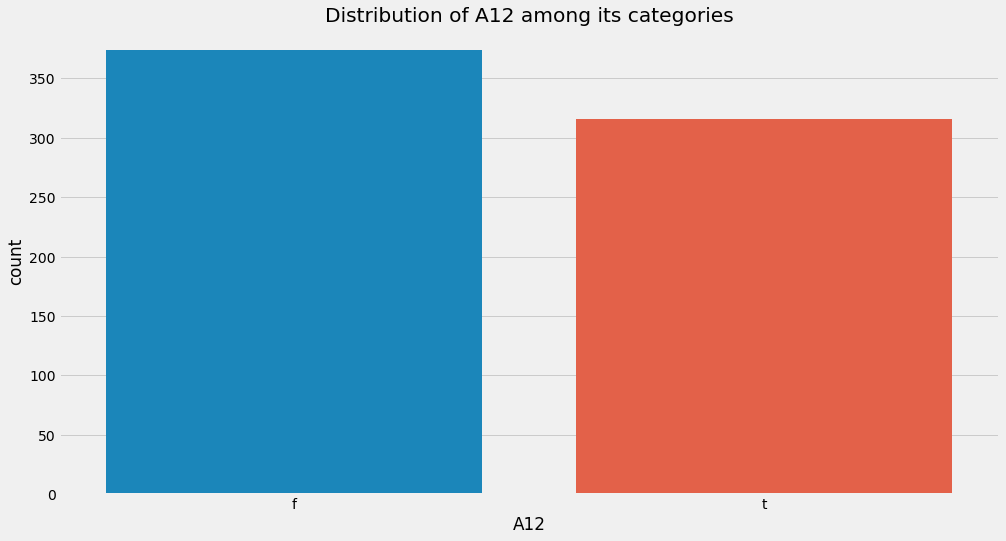

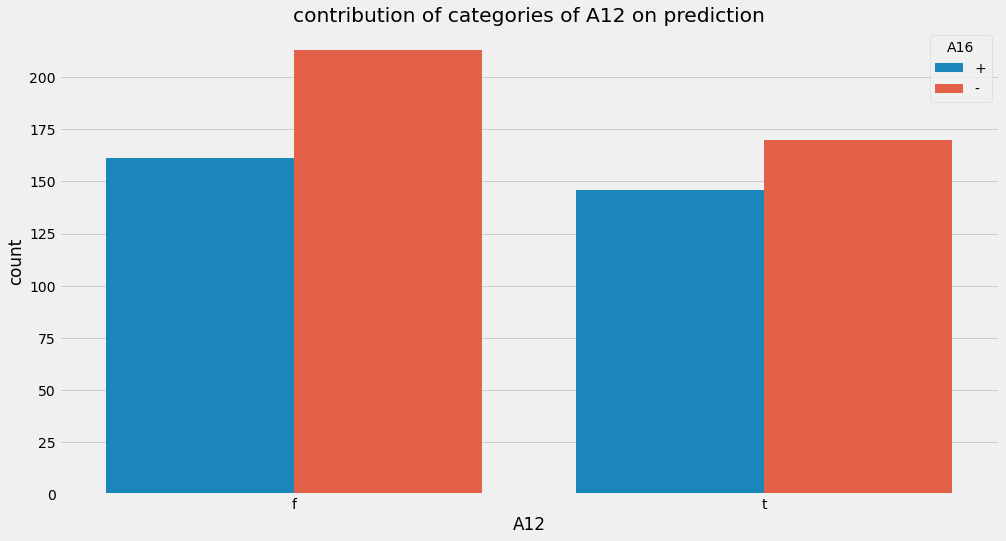

In [26]:
Categorical_visual('A12')

Distribution of data in A13 among its categories
g    0.905797
s    0.082609
p    0.011594
Name: A13, dtype: float64



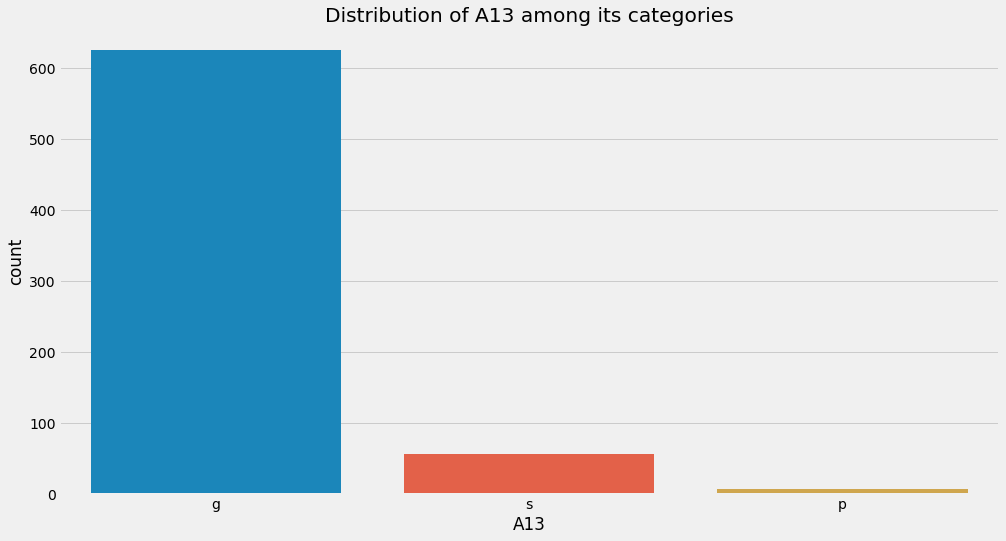

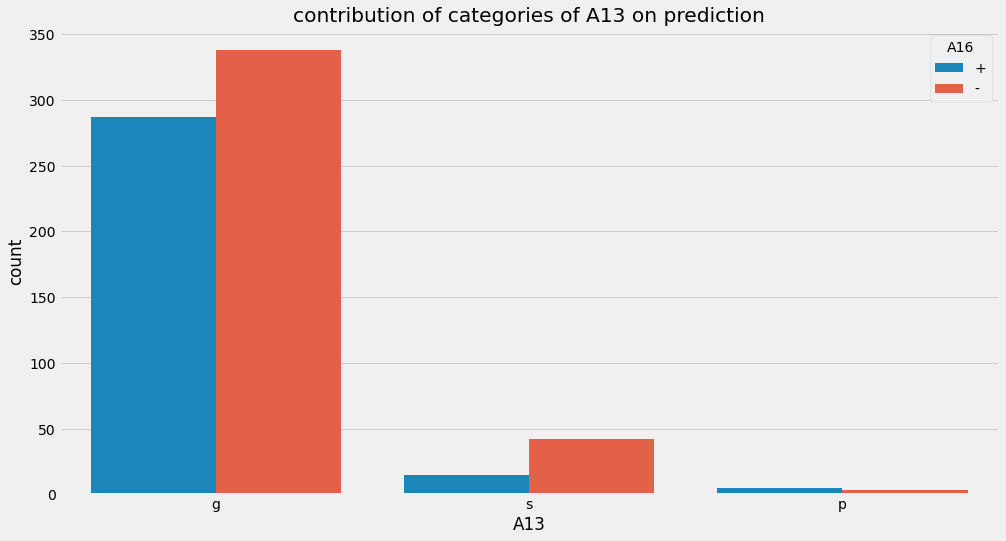

In [27]:
Categorical_visual('A13')

###### visualizing numerical variables

In [28]:
pd.qcut(data['A2'],3).value_counts()

(13.749, 23.92]    227
(23.92, 34.17]     226
(34.17, 80.25]     225
Name: A2, dtype: int64

In [29]:
# helper function for 
def numerical_plot(col):
    plt.figure(figsize = (15,8))
    sns.distplot(data[col])
    plt.title(f'distributions of data in {col}')
    plt.show()  

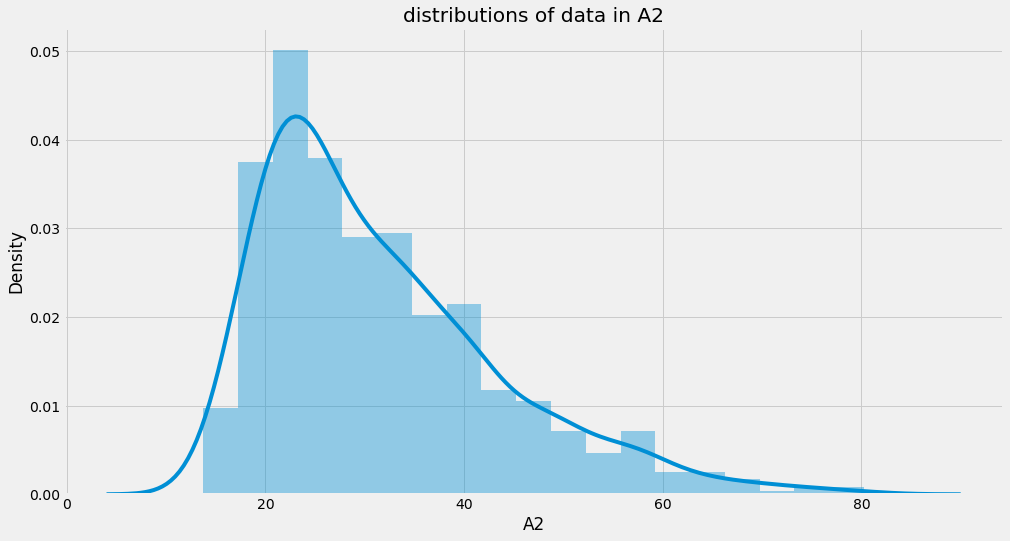

In [30]:
numerical_plot('A2')

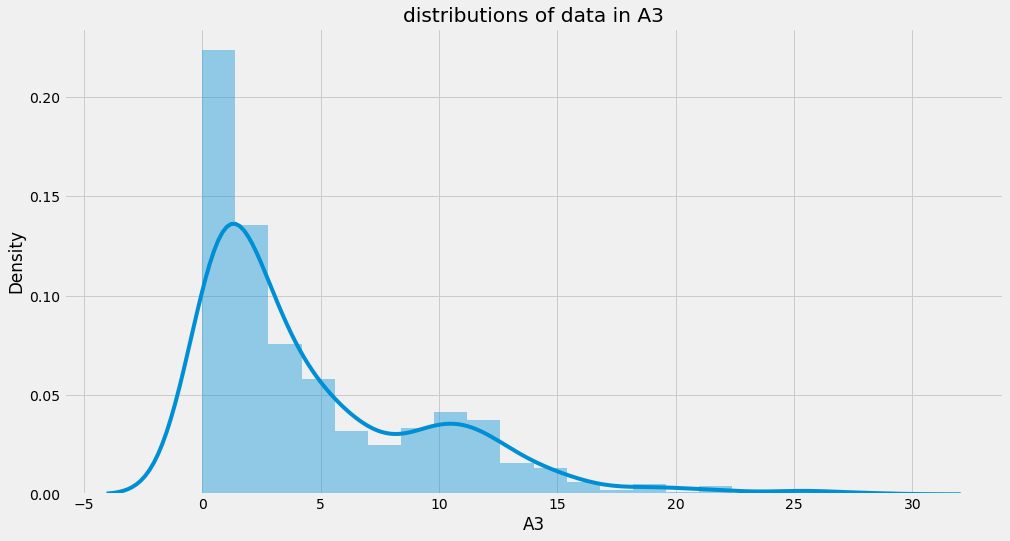

In [31]:
numerical_plot('A3')

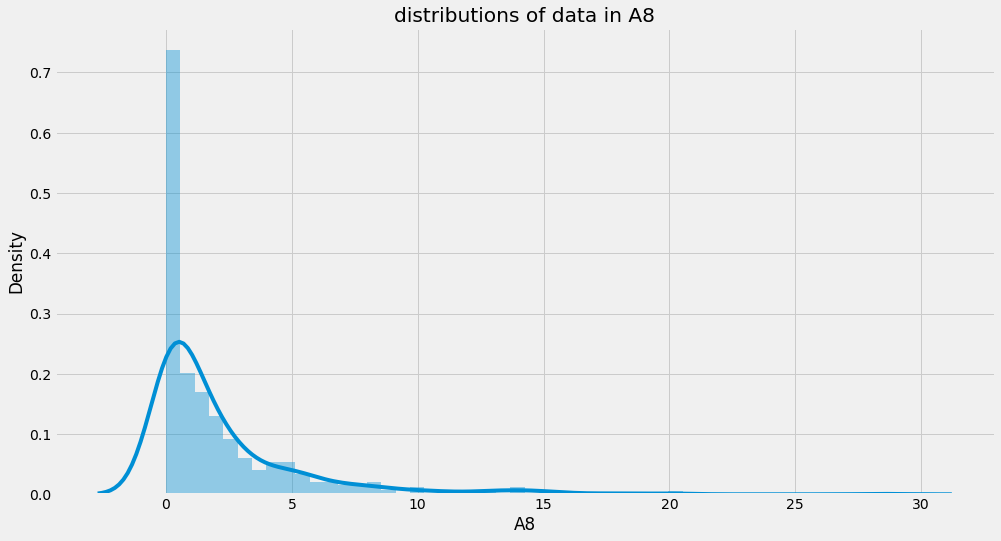

In [32]:
numerical_plot('A8')

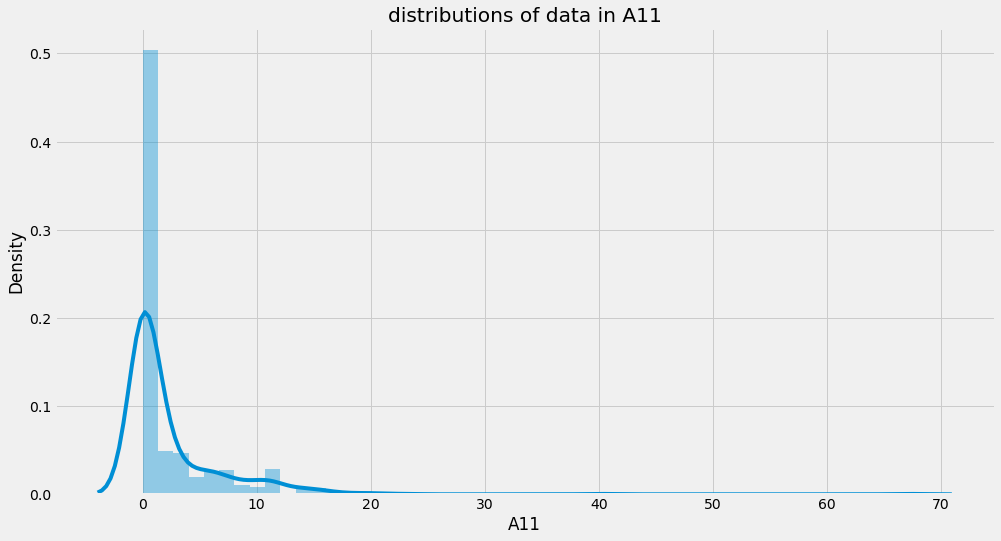

In [33]:
numerical_plot('A11')

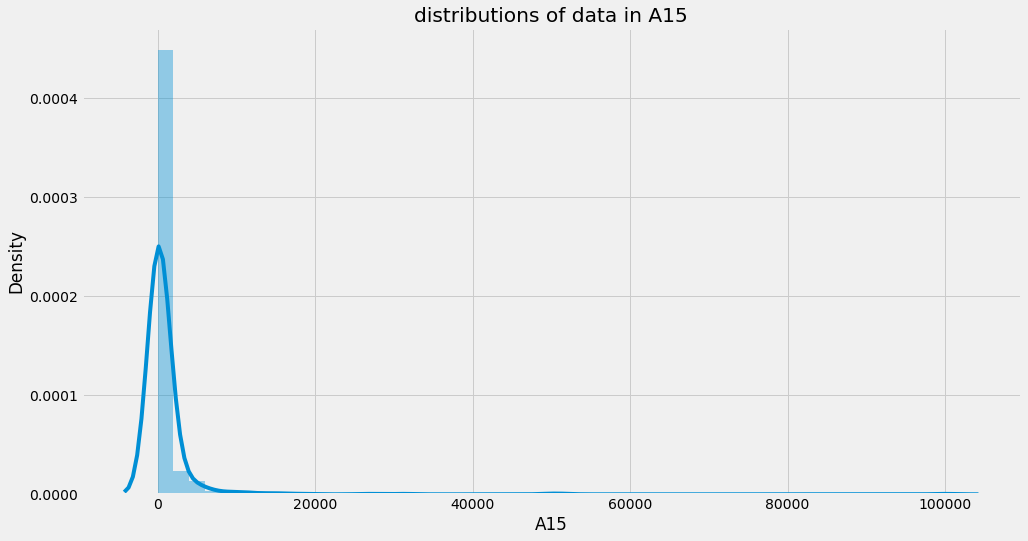

In [34]:
numerical_plot('A15')

In [35]:
#helper function to help on checking outliers and visualize data distribution of numerical variables
def Numerical_box(col):
    plt.figure(figsize = (15,8))
    sns.boxplot(y=data[col])
    plt.title(f'{col} box plot')

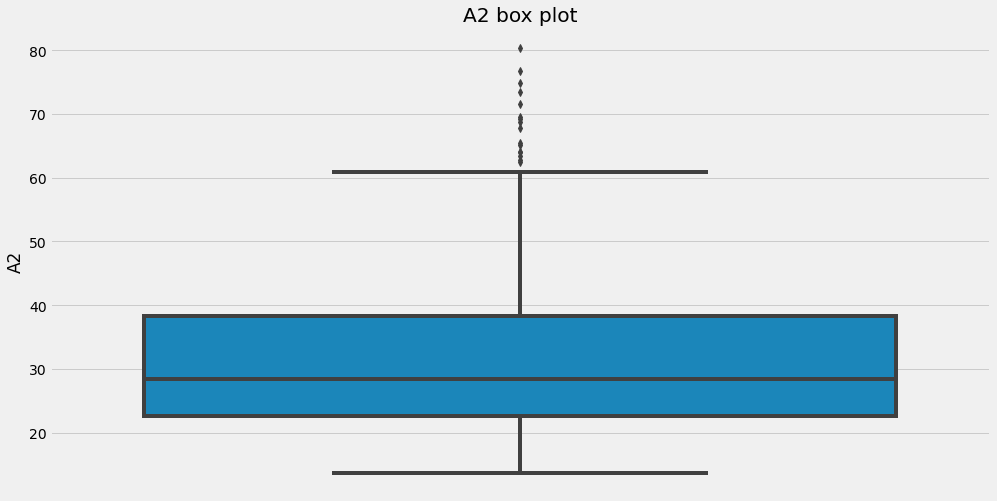

In [36]:
Numerical_box('A2')

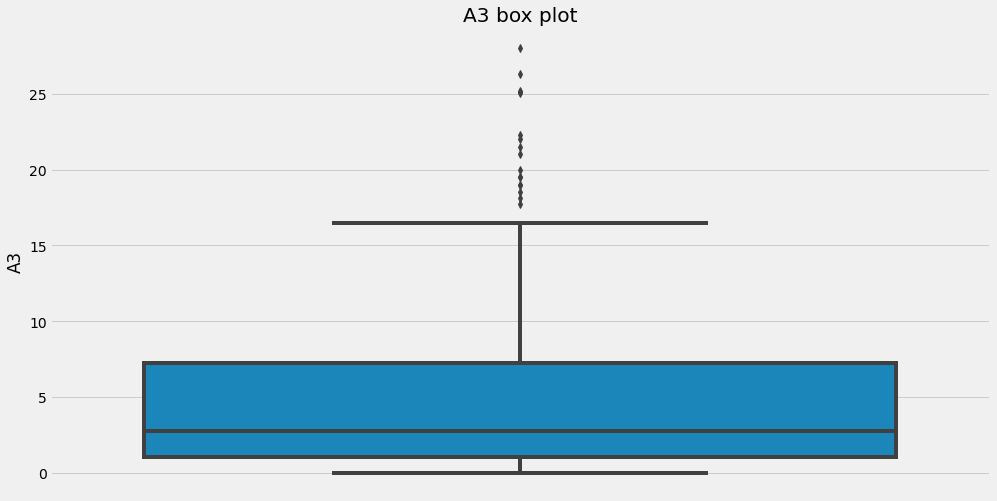

In [37]:
Numerical_box('A3')

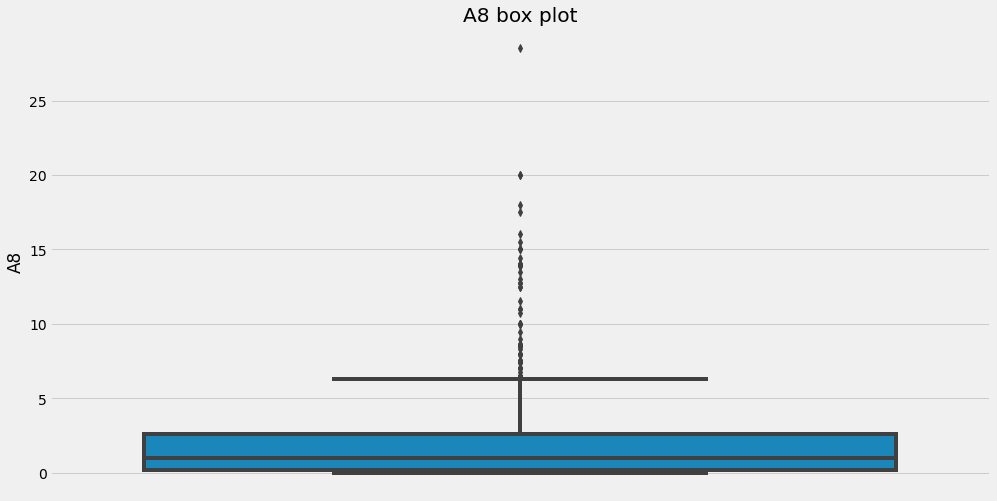

In [38]:
Numerical_box('A8')

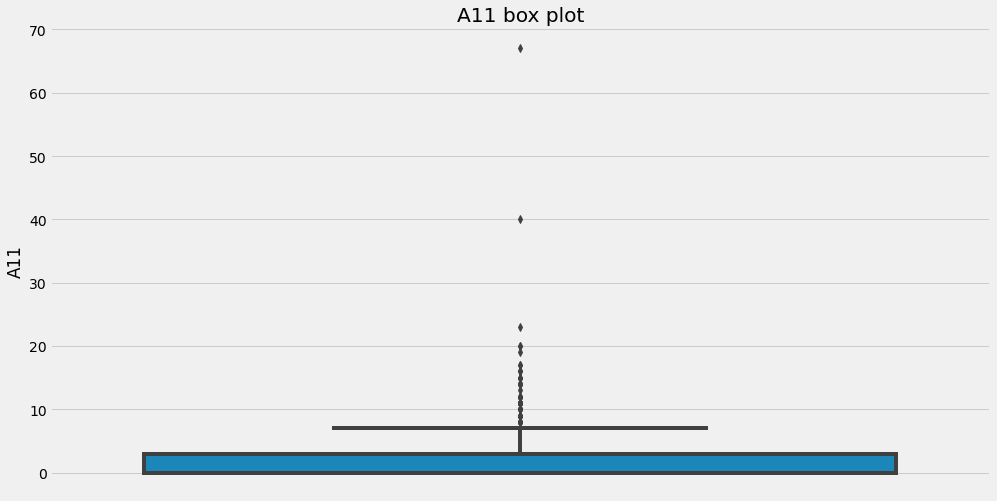

In [39]:
Numerical_box('A11')

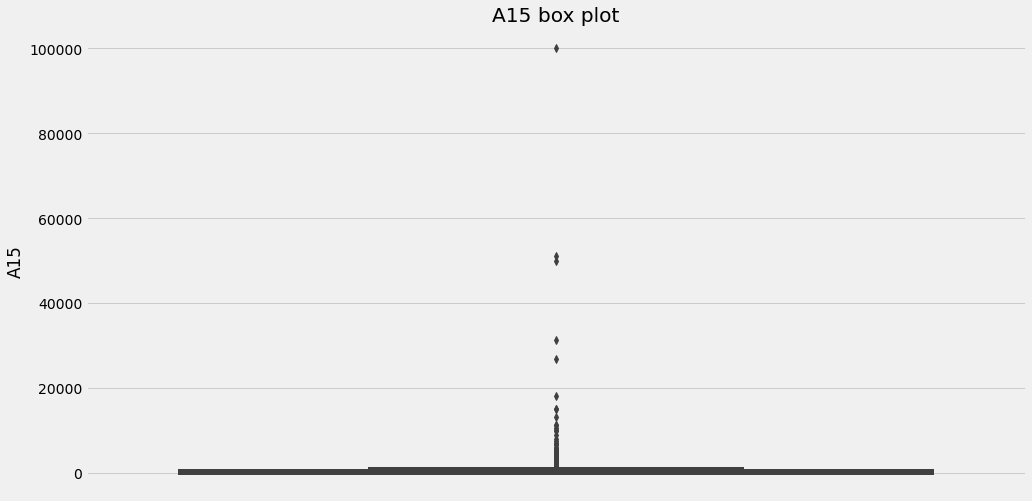

In [41]:
Numerical_box('A15')

In [43]:
#showing showing the number of outiliwes for numerical columns
numeric=data[['A2','A3','A8','A11','A15']]
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

A15    113
A11     79
A8      63
A3      17
A2      16
dtype: int64

The dataset contains outliers in numerical columns.

# Preprocessing, Feature Selection and Engineering

###### handling missing values

In [44]:
# Handling missing values
data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A15     0
A16     0
dtype: int64

In [45]:
# handling missing values for categorical variables
categ= ['A1','A4','A5','A6','A7']
for col in categ:
     data[col].fillna(data[col].value_counts().index[0],inplace=True)

In [46]:
# handling missing values for numerical variables
numerical= ['A2']
for col in numerical:
     data[col].fillna(data[col].mean(),inplace=True)

In [47]:
data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A15    0
A16    0
dtype: int64

###### handling outliers

As it was discovered above with box plot ploted in EDA outliers are in the numerical variables.and we may handle them  by using  **Flooring and capping technique**.In this quantile-based technique, we will do the flooring(25th percentile) for the lower values and capping(for the 75th percentile) for the higher values. 

In [50]:
numeric=data[['A2','A3','A8','A11','A15']]
Q1 =numeric .quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
numeric=np.where(numeric>upper_whisker,upper_whisker,np.where(numeric<lower_whisker,lower_whisker,numeric))
Non_out=pd.DataFrame(numeric)
Non_out.columns=['A2','A3','A8','A11','A15']

###### checking if the outliers are removed

In [51]:
numeric=Non_out[['A2','A3','A8','A11','A15']]
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

A2     0
A3     0
A8     0
A11    0
A15    0
dtype: int64

now our datasets has no outliers

In [54]:
new_data=pd.concat([Non_out,data[["A1","A4","A5","A6","A7","A9","A10","A12","A13","A16"]]],axis=1)

###### Data scaling

we can use Minmax scaler to performe data scaling for our data to have the same weight on prediction

In [55]:
#scaling will pe performed on numerical variables
scaler=MinMaxScaler()
new_data[['A2','A3','A8','A11','A15']] = scaler.fit_transform(new_data[['A2','A3','A8','A11','A15']])

###### label encoding for target variable 
our target variable has binary values that can be mapped to zero and one

In [56]:
new_data['A16']=LabelEncoder().fit_transform(new_data['A16'])

###### Encoding categorical variables with two categories

In [57]:
#label encoding for other 
new_data['A1']=LabelEncoder().fit_transform(new_data['A1'])
new_data['A9']=LabelEncoder().fit_transform(new_data['A9'])
new_data['A10']=LabelEncoder().fit_transform(new_data['A10'])
new_data['A12']=LabelEncoder().fit_transform(new_data['A12'])

###### Getting dummies for our categorical variables with more than two categories

In [58]:
new_data= pd.get_dummies(new_data,columns=['A4','A5','A6','A7','A13'])

###### Correlation matrix

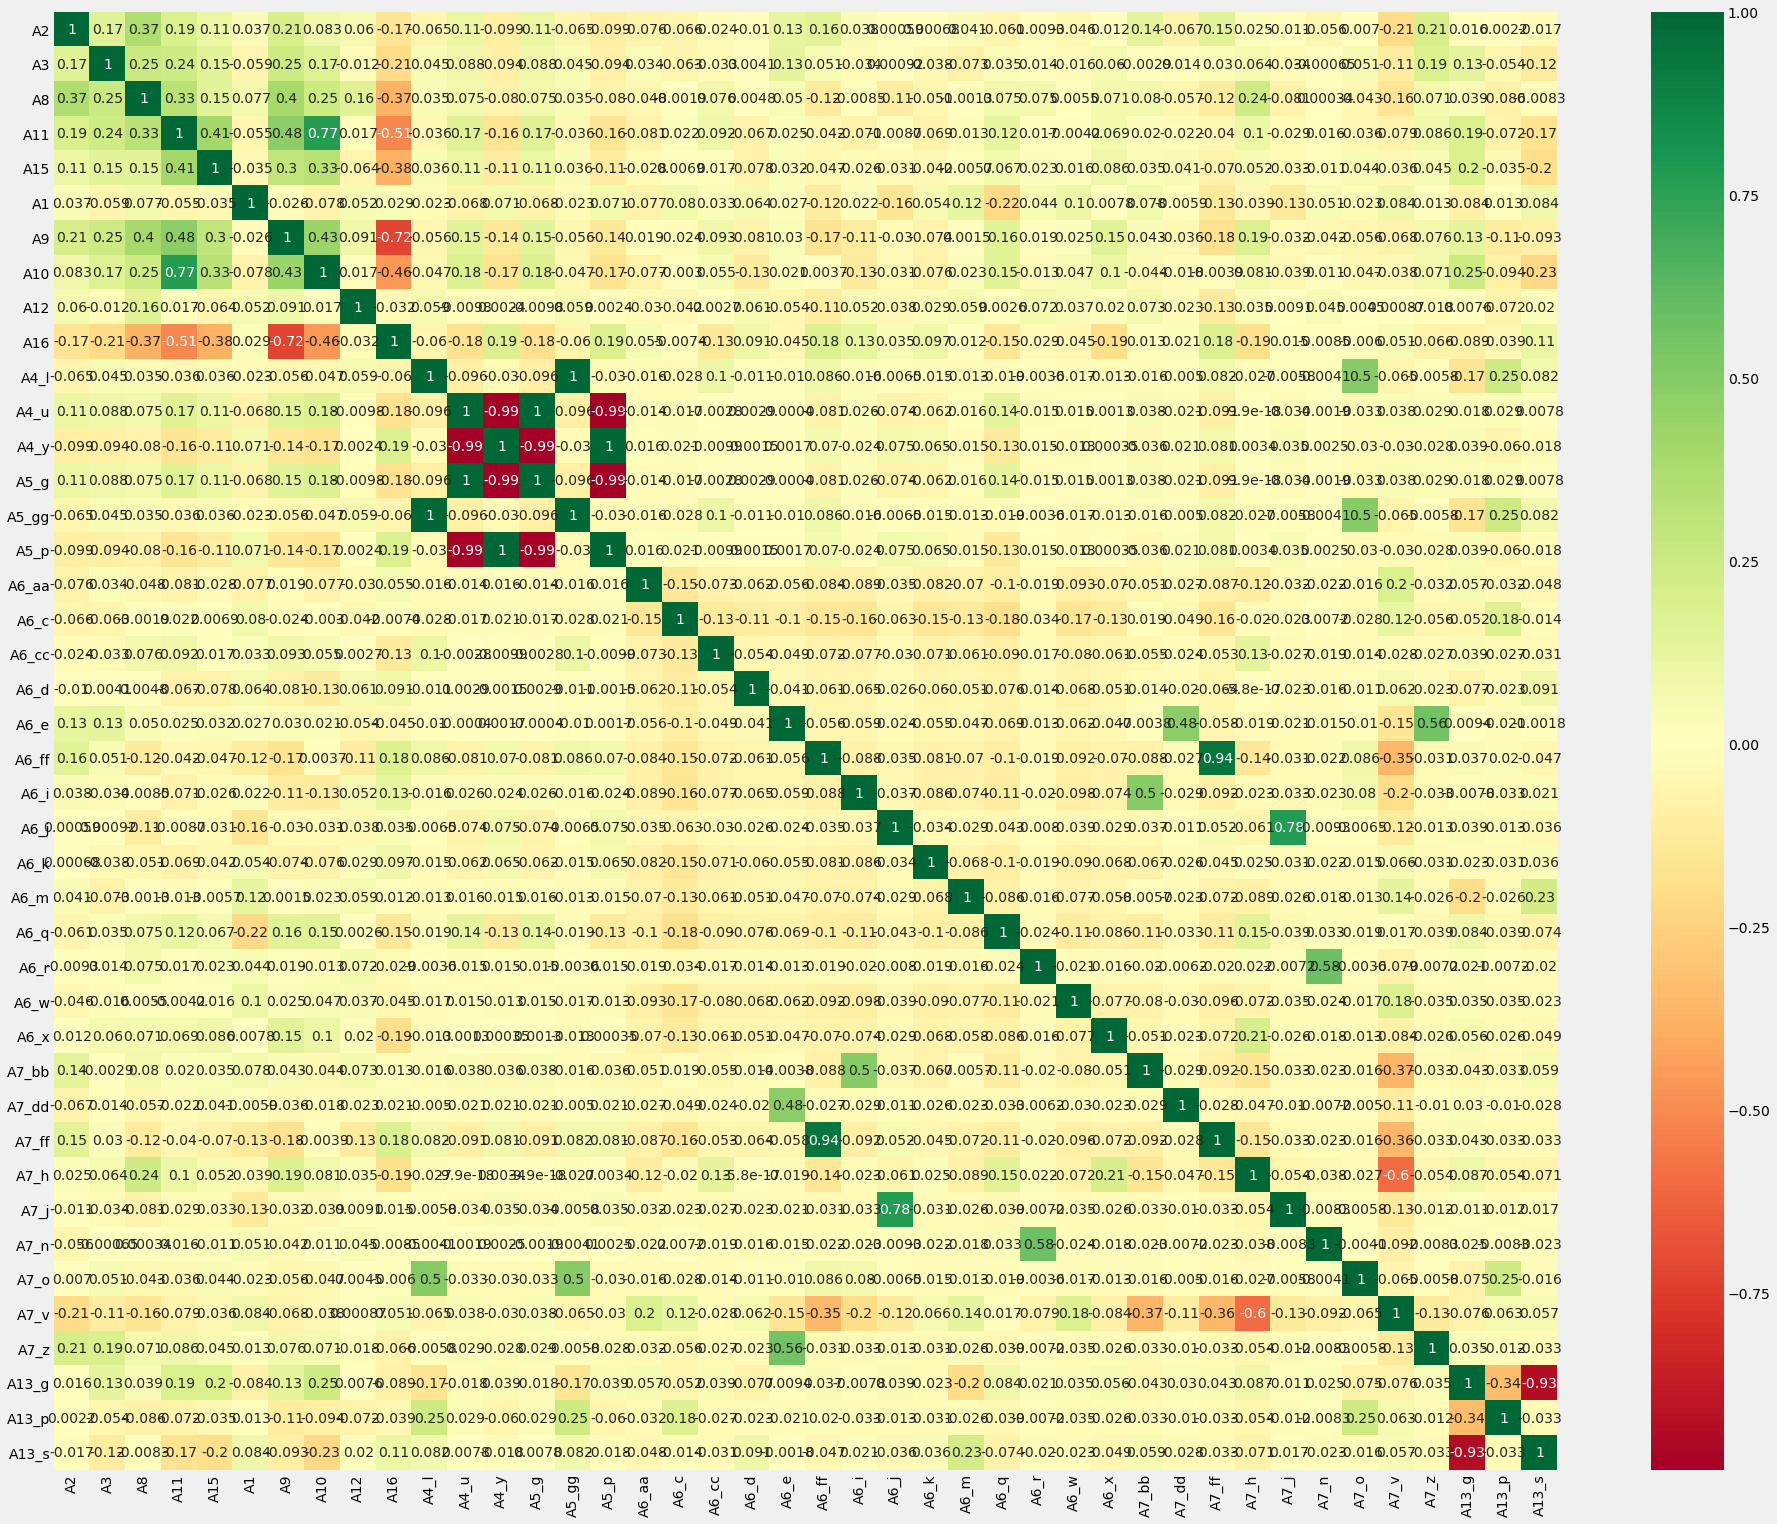

In [59]:
correlation=new_data.corr()
plt.figure(figsize = (30,25))
plt.style.use('fivethirtyeight')
heat_map = sns.heatmap(correlation,annot=True,cmap="RdYlGn",)
plt.show()

# Model creation and evaluation:


###### Defaut neural network model

In [60]:
X = new_data.loc[:, new_data.columns != 'A16']
y= new_data[['A16']]

In [61]:
mlp_model = MLPClassifier()
mlp_model.fit(X,y)
y_pred = mlp_model.predict(X)

###### model evaluation 10-fold cross validation

In [62]:
cv=KFold(n_splits=10,shuffle = True,random_state=0)
accuracy = np.mean(cross_val_score(mlp_model, X, y, cv=cv, scoring='accuracy'))
print(f"accuracy:{round((accuracy),4)}")
f1_score = np.mean(cross_val_score(mlp_model, X, y, cv=cv, scoring='f1_weighted'))
print(f"f1_score:{round(f1_score,4)}")
model_param=[accuracy,f1_score]

accuracy:0.8594
f1_score:0.8548


###### hyperparameter tuning (with Grid Search), and based on 10-fold crossvalidation

In [63]:
mlp_model = MLPClassifier()
parameters = {'hidden_layer_sizes':[(10,10,10),(30,30,30),(30,40,30),(50,100,50)],'max_iter':[1,10,50],'activation':['identity','logistic','tanh','relu'],'learning_rate':['constant','adaptive'],'solver':['sdg','adam','lbfgs']}
cv=KFold(n_splits=10,shuffle = True,random_state=0)
search_= GridSearchCV(mlp_model,param_grid=parameters, scoring='accuracy',cv=cv)

In [64]:
search_.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), (30, 30, 30),
                                                (30, 40, 30), (50, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1, 10, 50],
                         'solver': ['sdg', 'adam', 'lbfgs']},
             scoring='accuracy')

In [65]:
best_parameters = search_.best_params_

In [66]:
mlp_model_turned = MLPClassifier(activation=best_parameters['activation'],hidden_layer_sizes=best_parameters['hidden_layer_sizes'],learning_rate=best_parameters['learning_rate'],max_iter=best_parameters['max_iter'],solver=best_parameters['solver'])

###### model evaluation 10-fold cross validation

In [67]:
cv=KFold(n_splits=10,shuffle = True,random_state=0)
accuracy = np.mean(cross_val_score(mlp_model, X, y, cv=cv, scoring='accuracy'))
print(f"accuracy:{round((accuracy),4)}")
f1_score_new = np.mean(cross_val_score(mlp_model_turned, X, y, cv=cv, scoring='f1_weighted'))
print(f"f1_score:{round(f1_score_new,4)}")
model_param_new=[accuracy,f1_score_new]

accuracy:0.8565
f1_score:0.8568


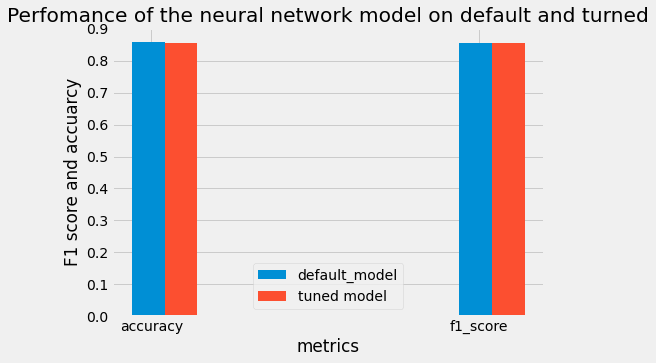

In [68]:
score=['accuracy','f1_score']
x=np.arange(2)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(x+0.0,model_param,width=0.1,label='default_model')
ax.bar(x+0.1,model_param_new,width=0.1,label='tuned model')
plt.xticks( [j+0.01 for j in x],score)
plt.title('Perfomance of the neural network model on default and turned')
plt.yticks(np.arange(0,1,0.1))
plt.ylabel('F1 score and accuarcy')
plt.xlabel('metrics')
plt.legend()
plt.savefig('metrics.png')
plt.show()